# MODELO DE CLASSIFICAÇÃO PARA DETECÇÃO DE FRAUDE DE CARTÃO CRÉDITO

O dataset utilizado pode ser baixado gratuitamente no link abaixo

 https://drive.google.com/file/d/1k56pz_9kxBHpmZALLA_9C4Jp_C_I6ANs/view?usp=sharing

# Atributos do dataset

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

#  Importação de bibliotecas

In [ ]:
# Dados
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import json

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Tunning hyperparameters
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Deploy
from joblib import dump, load

# Leitura de dados

In [ ]:
data = pd.read_json('/content/card_transdataBD')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [ ]:
data = pd.read_csv('/content/card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Descrição sucinta dos dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


# Vemos que não existem dados nulos no dataset

In [ ]:
data.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


# Vemos que não existem dados duplicados no dataset

In [ ]:
#Identificando duplicatas
df = data[data.duplicated(keep=False)]
display(df)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


# Análise de dados

## Distância do lar e incidência de fraude

,fraud,distance_from_home
0,0.0,22.832976
1,1.0,66.261876


Text(0, 0.5, 'Fraude')

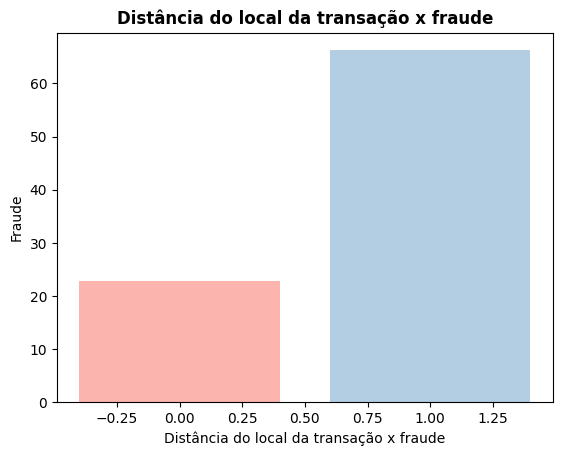

In [ ]:
df = data.groupby('fraud')['distance_from_home'].mean().to_frame().reset_index()
display(df)
plt.bar(df['fraud'],df['distance_from_home'],color=plt.get_cmap('Pastel1').colors)
plt.title('Distância do local da transação x fraude',fontsize=12,fontweight='bold')
plt.xlabel('Distância do local da transação x fraude')
plt.ylabel('Fraude')

## Distância da última transação e incidência de fraude

,fraud,distance_from_last_transaction
0,0.0,4.301391
1,1.0,12.712185


Text(0, 0.5, 'Fraude')

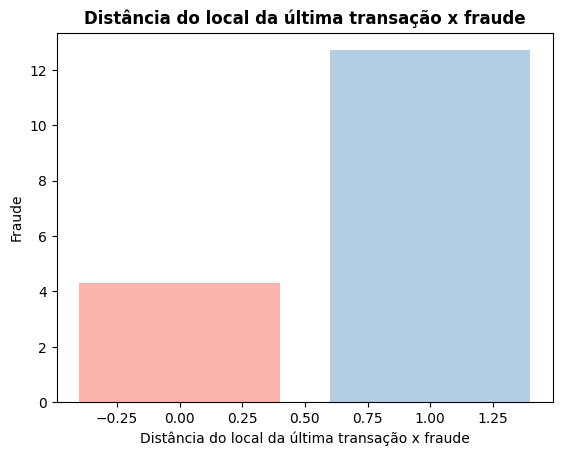

In [ ]:
df = data.groupby('fraud')['distance_from_last_transaction'].mean().to_frame().reset_index()
display(df)
plt.bar(df['fraud'],df['distance_from_last_transaction'],color=plt.get_cmap('Pastel1').colors)
plt.title('Distância do local da última transação x fraude',fontsize=12,fontweight='bold')
plt.xlabel('Distância do local da última transação x fraude')
plt.ylabel('Fraude')

## Razão entre o preço de compra e a mediana dos preços das transações x fraude

,fraud,ratio_to_median_purchase_price
0,0.0,1.423642
1,1.0,6.006323


Text(0, 0.5, 'Fraude')

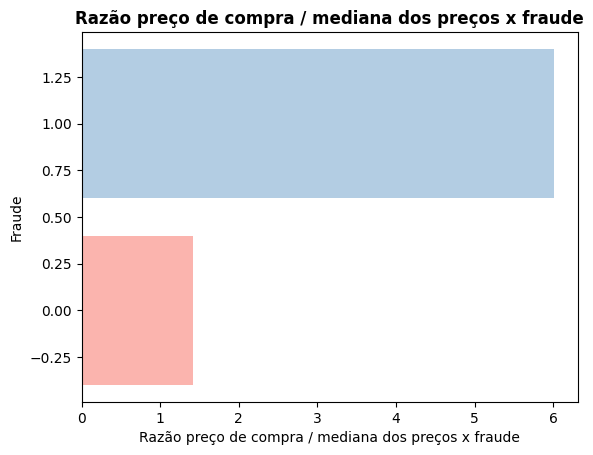

In [ ]:
df = data.groupby('fraud')['ratio_to_median_purchase_price'].mean().to_frame().reset_index()
display(df)
plt.barh(df['fraud'],df['ratio_to_median_purchase_price'],color=plt.get_cmap('Pastel1').colors)
plt.title('Razão preço de compra / mediana dos preços x fraude',fontsize=12,fontweight='bold')
plt.xlabel('Razão preço de compra / mediana dos preços x fraude')
plt.ylabel('Fraude')

## Transações de vendedor não repetido x fraude



<ipython-input-14-6306b5d340cf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['fraud'].replace({0:'NÃO',1:'SIM'},inplace=True)


,fraud,# transações,% transações
0,NÃO,107986,0.911551
1,SIM,10478,0.088449


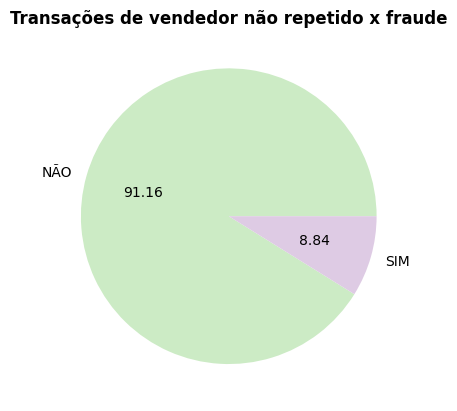

In [ ]:
df1 = data[data['repeat_retailer']==0]
df1 = df1.groupby('fraud')['online_order'].count().to_frame().reset_index()
df1.columns = ['fraud','# transações']
df1['fraud'].replace({0:'NÃO',1:'SIM'},inplace=True)
df1['% transações'] = df1['# transações']/df1['# transações'].sum()
display(df1)

plt.pie(df1['% transações'],colors=[plt.get_cmap('Pastel1').colors[2],plt.get_cmap('Pastel1').colors[3]],
        labels = df1['fraud'],autopct='%.2f')
plt.title("Transações de vendedor não repetido x fraude",fontsize=12,fontweight='bold')
plt.show()



## Transações de vendedor repetido x fraude


<ipython-input-15-17a862de81a1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['fraud'].replace({0:'NÃO',1:'SIM'},inplace=True)


,fraud,# transações,% transações
0,NÃO,804611,0.912738
1,SIM,76925,0.087262


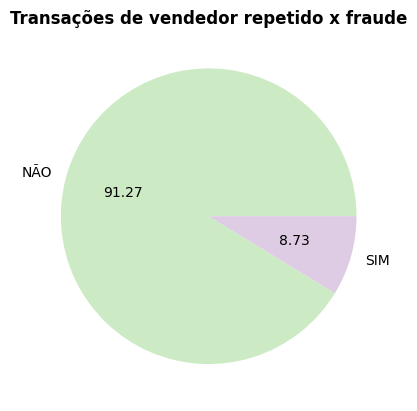

In [ ]:
df1 = data[data['repeat_retailer']==1]
df1 = df1.groupby('fraud')['online_order'].count().to_frame().reset_index()
df1.columns = ['fraud','# transações']
df1['fraud'].replace({0:'NÃO',1:'SIM'},inplace=True)
df1['% transações'] = df1['# transações']/df1['# transações'].sum()
display(df1)

plt.pie(df1['% transações'],colors=[plt.get_cmap('Pastel1').colors[2],plt.get_cmap('Pastel1').colors[3]],
        labels = df1['fraud'],autopct='%.2f')
plt.title("Transações de vendedor repetido x fraude",fontsize=12,fontweight='bold')
plt.show()

# Transações fraudulentas com e sem chip



<ipython-input-16-312159119737>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['used_chip'].replace({0:'NÃO',1:'SIM'},inplace=True)


,used_chip,total_frauds,% fraud
0,NÃO,64993,74.360148
1,SIM,22410,25.639852


Text(0, 0.5, '% de transações')

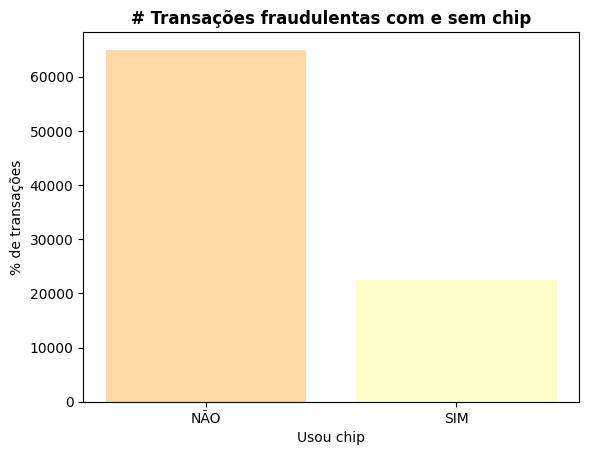

In [ ]:
df = data[data['fraud']==1]
df = df.groupby('used_chip')['fraud'].count().to_frame().reset_index()
df.columns = ['used_chip','total_frauds']
df['used_chip'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% fraud'] = 100*(df['total_frauds']/df['total_frauds'].sum())
display(df)

plt.bar(df['used_chip'],df['total_frauds'],color = [plt.get_cmap('Pastel1').colors[4],plt.get_cmap('Pastel1').colors[5]])
plt.title('# Transações fraudulentas com e sem chip',fontsize=12,fontweight='bold')
plt.xlabel('Usou chip')
plt.ylabel('% de transações')

# Transações não fraudulentas com e sem chip





<ipython-input-17-2d6610c693aa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['used_chip'].replace({0:'NÃO',1:'SIM'},inplace=True)


,used_chip,total_frauds,% fraud
0,NÃO,584608,64.05982
1,SIM,327989,35.94018


Text(0, 0.5, '% de transações')

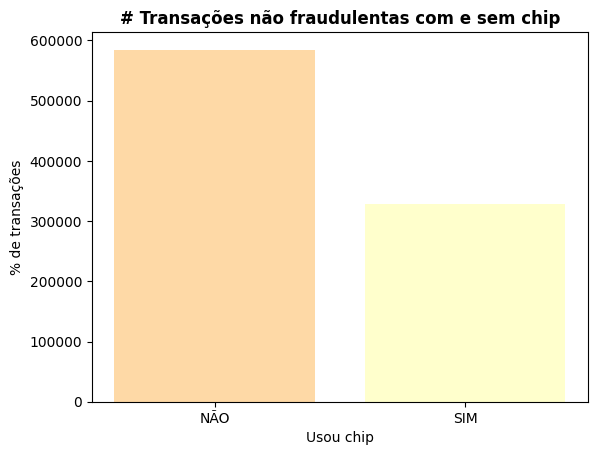

In [ ]:
df = data[data['fraud']==0]
df = df.groupby('used_chip')['fraud'].count().to_frame().reset_index()
df.columns = ['used_chip','total_frauds']
df['used_chip'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% fraud'] = 100*(df['total_frauds']/df['total_frauds'].sum())
display(df)

plt.bar(df['used_chip'],df['total_frauds'],color = [plt.get_cmap('Pastel1').colors[4],plt.get_cmap('Pastel1').colors[5]])
plt.title('# Transações não fraudulentas com e sem chip',fontsize=12,fontweight='bold')
plt.xlabel('Usou chip')
plt.ylabel('% de transações')

# Transações não fraudulentas com e sem uso do número do pin

<ipython-input-18-5c9f4fd3391f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['used_pin_number'].replace({0:'NÃO',1:'SIM'},inplace=True)


,used_pin_number,total_frauds,% fraud
0,NÃO,812262,89.005552
1,SIM,100335,10.994448


Text(0, 0.5, 'Ocorrência de fraude')

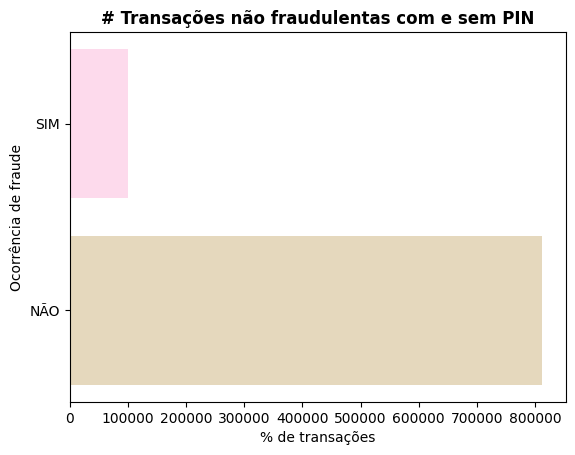

In [ ]:
df = data[data['fraud']==0]
df = df.groupby('used_pin_number')['fraud'].count().to_frame().reset_index()
df.columns = ['used_pin_number','total_frauds']
df['used_pin_number'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% fraud'] = 100*(df['total_frauds']/df['total_frauds'].sum())
display(df)

plt.barh(df['used_pin_number'],df['total_frauds'],color = [plt.get_cmap('Pastel1').colors[6],plt.get_cmap('Pastel1').colors[7]])
plt.title('# Transações não fraudulentas com e sem PIN',fontsize=12,fontweight='bold')
plt.xlabel('% de transações')
plt.ylabel('Ocorrência de fraude')


# Transações fraudulentas com e sem uso do número do pin

<ipython-input-19-2f3ca86c62b9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['used_pin_number'].replace({0:'NÃO',1:'SIM'},inplace=True)


,used_pin_number,total_frauds,% fraud
0,NÃO,87130,99.687654
1,SIM,273,0.312346


Text(0, 0.5, 'Ocorrência de fraude')

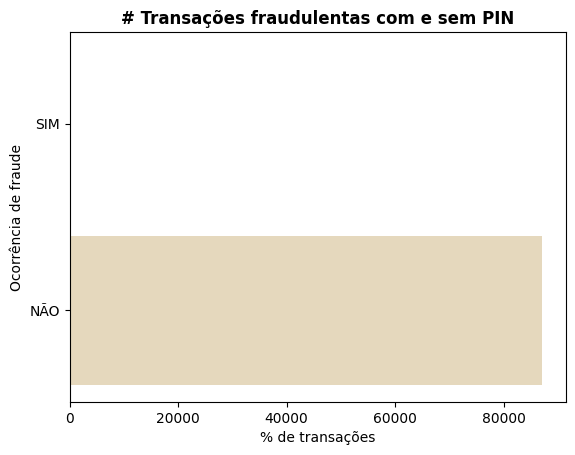

In [ ]:
df = data[data['fraud']==1]
df = df.groupby('used_pin_number')['fraud'].count().to_frame().reset_index()
df.columns = ['used_pin_number','total_frauds']
df['used_pin_number'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% fraud'] = 100*(df['total_frauds']/df['total_frauds'].sum())
display(df)

plt.barh(df['used_pin_number'],df['total_frauds'],color = [plt.get_cmap('Pastel1').colors[6],plt.get_cmap('Pastel1').colors[7]])
plt.title('# Transações fraudulentas com e sem PIN',fontsize=12,fontweight='bold')
plt.xlabel('% de transações')
plt.ylabel('Ocorrência de fraude')

# Transações online ou não na ausência fraude



<ipython-input-20-1a70080aa8c3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['online_order'].replace({0:'NÃO',1:'SIM'},inplace=True)


,online_order,total,% online_order
0,NÃO,344756,37.777464
1,SIM,567841,62.222536


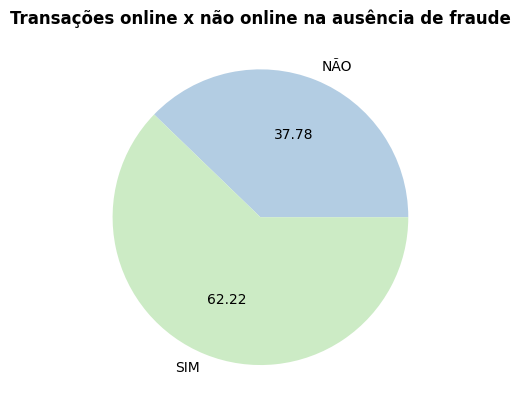

In [ ]:
df = data[data['fraud']==0]
df = df.groupby('online_order')['fraud'].count().to_frame().reset_index()
df.columns = ['online_order','total']
df['online_order'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% online_order'] = 100*(df['total']/df['total'].sum())
display(df)

plt.pie(df['% online_order'],colors=[plt.get_cmap('Pastel1').colors[1],plt.get_cmap('Pastel1').colors[2]],
        labels = df['online_order'],autopct='%.2f')
plt.title("Transações online x não online na ausência de fraude",fontsize=12,fontweight='bold')
plt.show()


# Transações online ou não na ocorrência de fraude



<ipython-input-21-743a06843e15>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['online_order'].replace({0:'NÃO',1:'SIM'},inplace=True)


,online_order,total,% online_order
0,NÃO,4692,5.368237
1,SIM,82711,94.631763


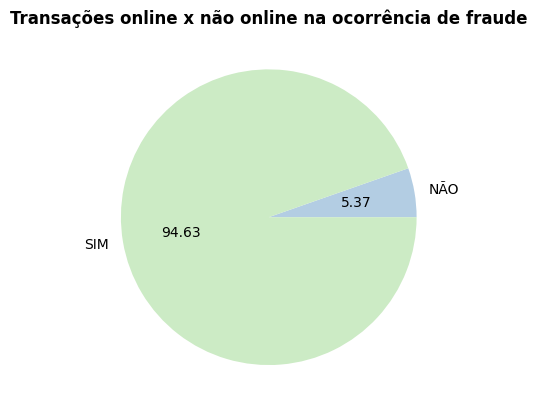

In [ ]:
df = data[data['fraud']==1]
df = df.groupby('online_order')['fraud'].count().to_frame().reset_index()
df.columns = ['online_order','total']
df['online_order'].replace({0:'NÃO',1:'SIM'},inplace=True)
df['% online_order'] = 100*(df['total']/df['total'].sum())
display(df)

plt.pie(df['% online_order'],colors=[plt.get_cmap('Pastel1').colors[1],plt.get_cmap('Pastel1').colors[2]],
        labels = df['online_order'],autopct='%.2f')
plt.title("Transações online x não online na ocorrência de fraude",fontsize=12,fontweight='bold')
plt.show()

# Visualização e exportação dos dados tratados

In [ ]:
data.to_csv('dados_tratados.csv')
display(data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Separação de dados de treino e de teste e ajuste de escala

In [ ]:
X = data[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']]
Y = data[['fraud']]

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X),columns = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [ ]:
display(X_train)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
506532,0.001012,1.247303e-04,0.000769,1.0,0.0,0.0,0.0
327991,0.000272,7.447813e-06,0.019852,1.0,0.0,0.0,1.0
715937,0.000342,3.457588e-05,0.007257,1.0,0.0,0.0,1.0
860726,0.001219,6.973553e-04,0.000574,1.0,1.0,0.0,1.0
78617,0.000498,1.330080e-04,0.001222,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
259178,0.000050,2.935927e-04,0.000467,0.0,0.0,0.0,0.0
365838,0.010703,1.391652e-05,0.005673,1.0,0.0,0.0,0.0
131932,0.001925,3.592453e-07,0.003401,1.0,0.0,0.0,0.0
671155,0.000936,1.416755e-05,0.004368,1.0,0.0,0.0,1.0


In [ ]:
display(Y_train)

,fraud
506532,0.0
327991,1.0
715937,0.0
860726,0.0
78617,0.0
...,...
259178,0.0
365838,0.0
131932,0.0
671155,0.0


In [ ]:
display(X_test)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
987231,0.000087,0.000109,0.001332,0.0,0.0,0.0,1.0
79954,0.000057,0.000018,0.011630,0.0,0.0,0.0,1.0
567130,0.000372,0.000045,0.005883,1.0,0.0,0.0,0.0
500891,0.002050,0.000002,0.042616,1.0,0.0,0.0,0.0
55399,0.000311,0.000144,0.007560,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
463299,0.011541,0.000399,0.001920,1.0,1.0,0.0,0.0
728324,0.000876,0.000014,0.000882,1.0,0.0,0.0,0.0
76260,0.000386,0.000294,0.013690,1.0,1.0,0.0,0.0
77813,0.002433,0.000045,0.006522,1.0,1.0,0.0,0.0


In [ ]:
display(Y_test)

,fraud
987231,0.0
79954,0.0
567130,0.0
500891,0.0
55399,0.0
...,...
463299,0.0
728324,0.0
76260,0.0
77813,0.0


# Classificação por árvore de decisão

## Otimização de hiperparâmetros

In [ ]:
DTC = DecisionTreeClassifier()
param = {'max_depth':[1,2,3,4,5,6,7,8,9],'max_leaf_nodes':[2,3,4,5,6,7,8,9]}
grid = GridSearchCV(DTC,param,scoring='accuracy',cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_estimator_.get_params()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## Definição e aplicação do modelo

In [ ]:
DTC = DecisionTreeClassifier(ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 5,
 max_features = None,
 max_leaf_nodes = 9,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 random_state = None,
 splitter = 'best')

DTC.fit(X_train,Y_train)
Y_pred_train = pd.DataFrame(DTC.predict(X_train),columns=['fraud'])
Y_pred = pd.DataFrame(DTC.predict(X_test),columns=['fraud'])

In [ ]:
Y_pred.value_counts()

,count
fraud,
0.0,276928
1.0,23072


## Métricas e matriz de confusão para os dados de treino




In [ ]:
print('Métricas para os dados de treino')
print('')
print(f'acurácia = {accuracy_score(Y_train,Y_pred_train)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_train,Y_pred_train)}')
print(f'precisão = {precision_score(Y_train,Y_pred_train)}')
print(f'Score F1 = {f1_score(Y_train,Y_pred_train)}')
print(f'Recall = {recall_score(Y_train,Y_pred_train)}')
print(f'Score roc_auc = {roc_auc_score(Y_train,Y_pred_train)}')

Métricas para os dados de treino

acurácia = 0.9898557142857143
acurácia balanceada = 0.9420553579005777
precisão = 1.0
Score F1 = 0.9384912557277365
Recall = 0.8841107158011554
Score roc_auc = 0.9420553579005777


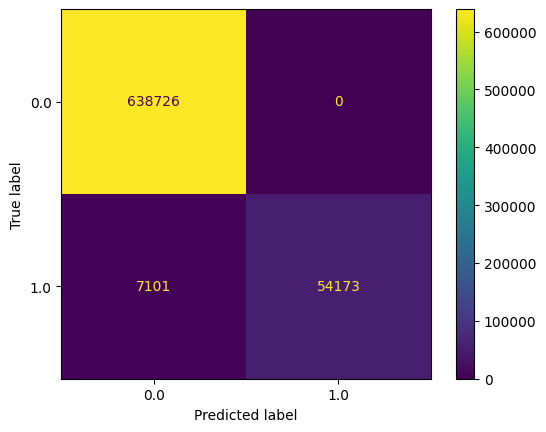

In [ ]:
CM = confusion_matrix(Y_train,Y_pred_train,labels = DTC.classes_)
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=DTC.classes_).plot()

## Métricas e matriz de confusão para os dados de teste


In [ ]:
print('Métricas para os dados de teste')
print('')
print(f'acurácia = {accuracy_score(Y_test,Y_pred)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_test,Y_pred)}')
print(f'precisão = {precision_score(Y_test,Y_pred)}')
print(f'Score F1 = {f1_score(Y_test,Y_pred)}')
print(f'Recall = {recall_score(Y_test,Y_pred)}')
print(f'Score roc_auc = {roc_auc_score(Y_test,Y_pred)}')

Métricas para os dados de teste

acurácia = 0.98981
acurácia balanceada = 0.9415017796318267
precisão = 1.0
Score F1 = 0.9378671165220219
Recall = 0.8830035592636534
Score roc_auc = 0.9415017796318267


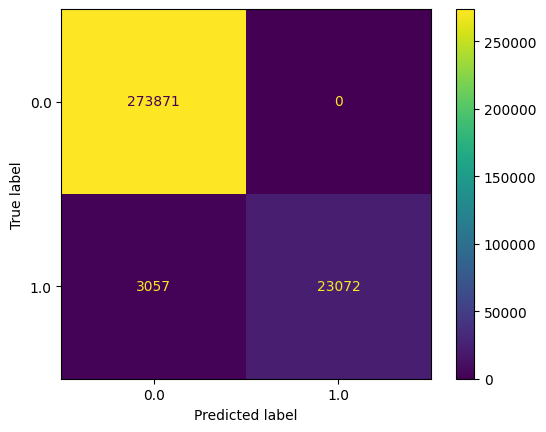

In [ ]:
CM = confusion_matrix(Y_test,Y_pred,labels = DTC.classes_)
CM
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=DTC.classes_).plot()

# Classificação por floresta de decisão

# Otimização de hiperparâmetros

In [ ]:
RF = RandomForestClassifier()

param = {"max_depth":[3,4,5,6,7,8]}

"""param = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}"""
grid = GridSearchCV(RF,param,scoring = "accuracy",cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_estimator_.get_params()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Definição e aplicação do modelo

In [ ]:
RF = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 8,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)
RF.fit(X_train,Y_train)
Y_pred = RF.predict(X_test)
Y_pred_train = RF.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Métricas e matriz de confusão para os dados de treino

In [ ]:
print('Métricas para os dados de treino')
print('')
print(f'acurácia = {accuracy_score(Y_train,Y_pred_train)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_train,Y_pred_train)}')
print(f'precisão = {precision_score(Y_train,Y_pred_train)}')
print(f'Score F1 = {f1_score(Y_train,Y_pred_train)}')
print(f'Recall = {recall_score(Y_train,Y_pred_train)}')
print(f'Score roc_auc = {roc_auc_score(Y_train,Y_pred_train)}')

Métricas para os dados de treino

acurácia = 0.9999985714285714
acurácia balanceada = 0.9999918399321082
precisão = 1.0
Score F1 = 0.999991839865521
Recall = 0.9999836798642164
Score roc_auc = 0.9999918399321082


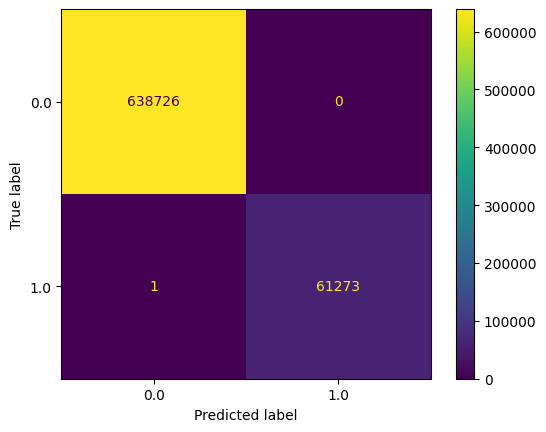

In [ ]:
CM = confusion_matrix(Y_train,Y_pred_train,labels = RF.classes_)
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=RF.classes_).plot()

## Métricas e matriz de confusão para os dados de teste

In [ ]:
print('Métricas para os dados de teste')
print('')
print(f'acurácia = {accuracy_score(Y_test,Y_pred)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_test,Y_pred)}')
print(f'precisão = {precision_score(Y_test,Y_pred)}')
print(f'Score F1 = {f1_score(Y_test,Y_pred)}')
print(f'Recall = {recall_score(Y_test,Y_pred)}')
print(f'Score roc_auc = {roc_auc_score(Y_test,Y_pred)}')

Métricas para os dados de teste

acurácia = 0.9999933333333333
acurácia balanceada = 0.9999617283478128
precisão = 1.0
Score F1 = 0.9999617268830373
Recall = 0.9999234566956255
Score roc_auc = 0.9999617283478128


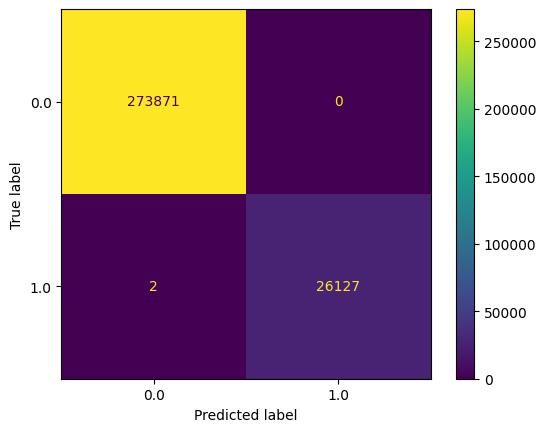

In [ ]:
CM = confusion_matrix(Y_test,Y_pred,labels = RF.classes_)
CM
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=RF.classes_).plot()

# Classificação por rede neural

## Otimização de hiperparâmetros

In [ ]:
model = MLPClassifier()

param = {'activation':['logistic','tanh','relu'],
         'learning_rate_init':[0.01,0.05]}


"""
param = {'hidden_layer_sizes':[(100,),(10,50,10),(20,),(100,100)],c,'solver':['sgd','adam']}"""

grid = GridSearchCV(model,param,scoring='accuracy',cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_estimator_.get_params()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Definição e aplicação do modelo

In [ ]:
model = MLPClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Métricas e matriz de confusão para os dados de treino

In [ ]:
print('Métricas para os dados de treino')
print('')
print(f'acurácia = {accuracy_score(Y_train,Y_pred_train)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_train,Y_pred_train)}')
print(f'precisão = {precision_score(Y_train,Y_pred_train)}')
print(f'Score F1 = {f1_score(Y_train,Y_pred_train)}')
print(f'Recall = {recall_score(Y_train,Y_pred_train)}')
print(f'Score roc_auc = {roc_auc_score(Y_train,Y_pred_train)}')

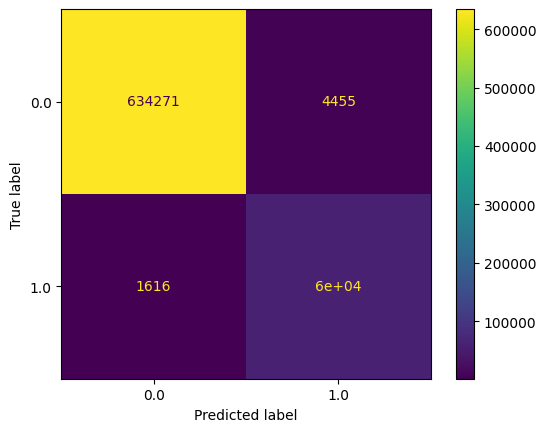

In [ ]:
CM = confusion_matrix(Y_train,Y_pred_train,labels = model.classes_)
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=model.classes_).plot()

## Métricas e matriz de confusão para os dados de teste

In [ ]:
print('Métricas para os dados de teste')
print('')
print(f'acurácia = {accuracy_score(Y_test,Y_pred)}')
print(f'acurácia balanceada = {balanced_accuracy_score(Y_test,Y_pred)}')
print(f'precisão = {precision_score(Y_test,Y_pred)}')
print(f'Score F1 = {f1_score(Y_test,Y_pred)}')
print(f'Recall = {recall_score(Y_test,Y_pred)}')
print(f'Score roc_auc = {roc_auc_score(Y_test,Y_pred)}')

Métricas para os dados de teste

acurácia = 0.9914433333333333
acurácia balanceada = 0.98343872476434
precisão = 0.9311594202898551
Score F1 = 0.9519765027220175
Recall = 0.9737456465995638
Score roc_auc = 0.98343872476434


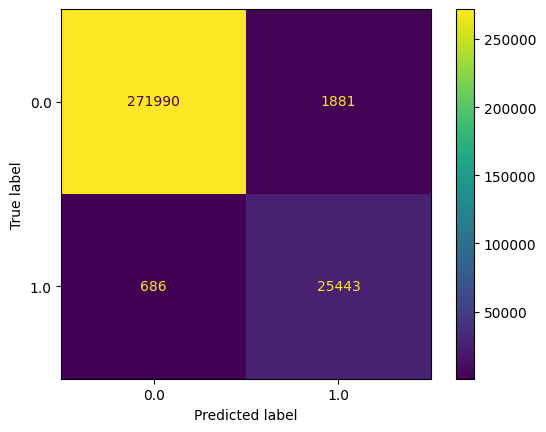

In [ ]:
CM = confusion_matrix(Y_test,Y_pred,labels = model.classes_)
CM
ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=model.classes_).plot()

**Comparando os resultados vemos que o modelo de floresta de decisão apresentou melhores resultados e será o método utilizado para futuras previsões**

# Salvando o modelo o modelo de floresta de decisão para fazer um deploy futuro

In [ ]:
"""Definindo e treinando o modelo (isto já foi feito antes, mas está sendo refeito apenas caso o programa não seja executado
desde o começo)"""
RF = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 8,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

RF.fit(X_train,Y_train)


# Armazenando o modelo
dump(RF,'random_forest.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['random_forest.joblib']

# Previsões

Uma vez feito o deploy e armazenado o modelo podemos simplesmente carregar o arquivo no colab e rodar o programa a partir daqui

# Carregando o modelo armazenado de floresta de decisão

In [ ]:
model = load('random_forest.joblib')

## Criando dados para previsão

In [ ]:
df = pd.DataFrame([[35.74,18.71,1.03],[0.2,0.45,0.09],[1.35,0.27,2.4],[0,0,1],[0,0,1],[0,0,1],[0,1,1]])
df = df.T
df.columns = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
df

## Realizando previsões com o modelo de floresta de decisão

In [ ]:
# Realizando a previsão
Y_pred = model.predict(df)

# imprimindo o resultado
df['previsão'] = Y_pred
display(df)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,previsão
0,35.74,0.20,1.35,0.0,0.0,0.0,0.0,1.0
1,18.71,0.45,0.27,0.0,0.0,0.0,1.0,1.0
2,1.03,0.09,2.40,1.0,1.0,1.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,previsão
0,35.74,0.20,1.35,0.0,0.0,0.0,0.0,1.0
1,18.71,0.45,0.27,0.0,0.0,0.0,1.0,1.0
2,1.03,0.09,2.40,1.0,1.0,1.0,1.0,0.0
